In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
# Read in the dataset, and do a little preprocessing,
# mostly to set the column datatypes.
users = pandas.read_csv('./users.dat', sep='::',
                        engine='python',
                        names=['userid', 'gender', 'age', 'occupation', 'zip']).set_index('userid')
ratings = pandas.read_csv('./ratings.dat', engine='python',
                          sep='::', names=['userid', 'movieid', 'rating', 'timestamp'])
movies_train = pandas.read_csv('./movies_train.dat', engine='python',
                         sep='::', names=['movieid', 'title', 'genre'], encoding='latin-1', index_col=False).set_index('movieid')
movies_test = pandas.read_csv('./movies_test.dat', engine='python',
                         sep='::', names=['movieid', 'title', 'genre'], encoding='latin-1', index_col=False).set_index('movieid')                         
movies_train['genre'] = movies_train.genre.str.split('|')
movies_test['genre'] = movies_test.genre.str.split('|')

In [2]:
# Convert the columns to the appropriate type.
users.age = users.age.astype('category')
users.gender = users.gender.astype('category')
users.occupation = users.occupation.astype('category')
ratings.movieid = ratings.movieid.astype('category')
ratings.userid = ratings.userid.astype('category')


In [3]:
movies_train.head()

,title,genre
movieid,,
1650,Washington Square (1997),[Drama]
185,"Net, The (1995)","[Sci-Fi, Thriller]"
1377,Batman Returns (1992),"[Action, Adventure, Comedy, Crime]"
3204,"Boys from Brazil, The (1978)",[Thriller]
1901,Dear Jesse (1997),[Documentary]


In [4]:
# Remove the timestamp column.
del ratings['timestamp']
ratings.head()

,userid,movieid,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [5]:
# Merge training and test data
movies = pandas.concat([movies_train, movies_test])

Data Visualization

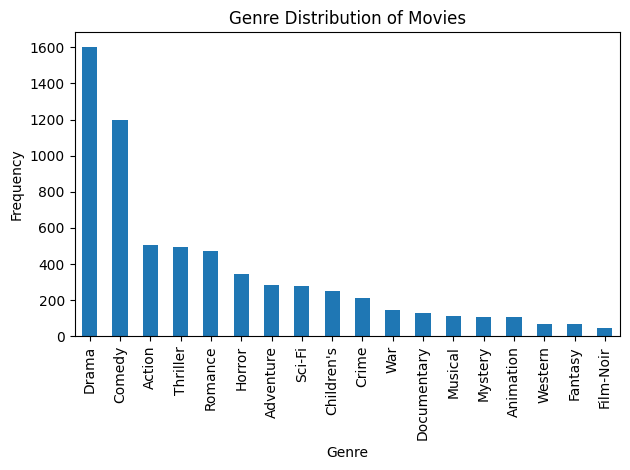

In [6]:
# Create a bar chart of the genres.
plt.figure()
movies.genre.explode().value_counts().plot(kind='bar')
plt.title('Genre Distribution of Movies')
plt.ylabel('Frequency')
plt.xlabel('Genre')
plt.tight_layout()
plt.show()

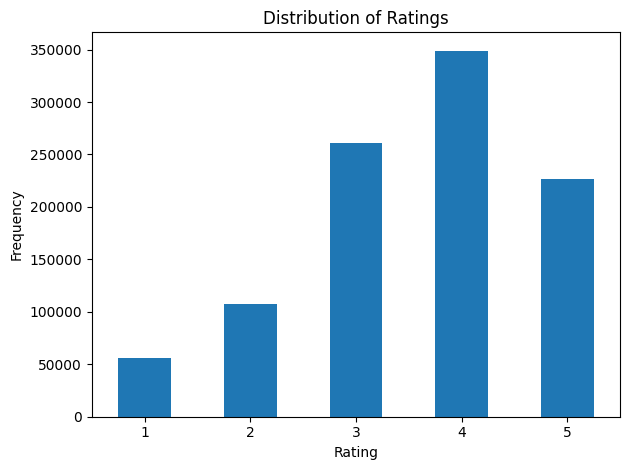

In [7]:
# Plot the distribution of ratings as  a bar chart.
plt.figure()
ratings.rating.value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Ratings')
plt.ylabel('Frequency')
plt.xlabel('Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

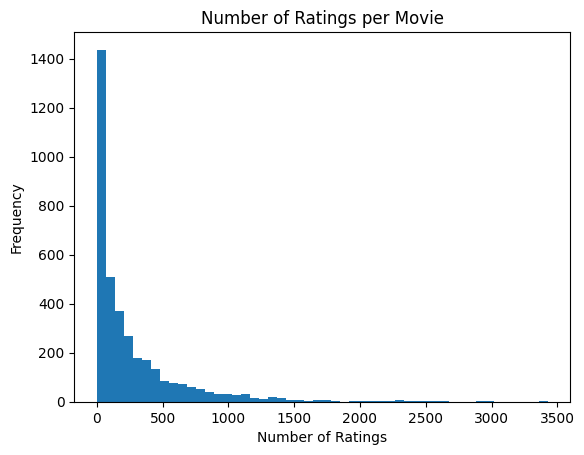

In [8]:
# Merge movies_train and ratings
movies_ratings = movies.merge(ratings, left_index=True, right_on='movieid', how='inner')

# Plot the number of ratings per movie
plt.figure()
movies_ratings.value_counts('movieid').plot.hist(bins=50)
plt.title('Number of Ratings per Movie')
plt.ylabel('Frequency')
plt.xlabel('Number of Ratings')
plt.show()